1. Given the dataset of Figure 1.4, instantiate a (2,2) topological map and execute one training epoch without considering the neighborhood function.

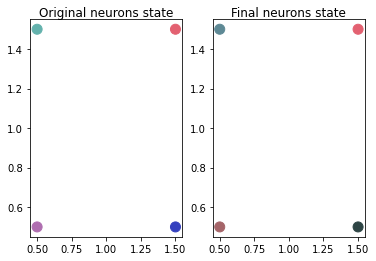

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
import random
import numpy as np
import math

#for reproducibility
random.seed(1)
np.random.seed(1)

#the training dataset from Fig. 1.4
xTrain = [[0.49, 0.10, 0.54]
,[0.56, 0.39, 0.40]
,[0.48, 0.33, 0.29]
,[0.61, 0.18, 0.35]
,[0.16, 0.23, 0.93]
,[0.36, 0.15, 0.87]
,[0.42, 0.21, 0.79]
,[0.33, 0.32, 0.86]
,[0.07, 0.52, 0.09]
,[0.35, 0.54, 0.16]
,[0.36, 0.47, 0.29]
,[0.14, 0.65, 0.18]
,[0.11, 0.07, 0.30]
,[0.09, 0.09, 0.04]
,[0.11, 0.29, 0.35]
,[0.04, 0.06, 0.07]]


#cols is a list containing 1000 randon colors
cols = []
for i in range(0,1000):
    cols.append([np.random.rand(),np.random.rand(),np.random.rand()])

#list containing all neurons
neurons = []

#dictionary containing the index of a neuron located at coordinate (x,y)
idxPoint = {}
ct = 0

x = [] 
y = []

#creates four neurons organized in a (2,2) grid
for i in np.arange(0.5,2.5,1):
    for j in np.arange(0.5, 2.5, 1):
        
        #x and y are necessary for displaying the scatter plot 
        x.append(i)
        y.append(j)

        idxPoint[(i,j)] = ct
        ct = ct + 1
        neurons.append(cols[np.random.randint(0,1000)])


#plot the state of the generated neurons in the grid
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.scatter(x,y,s=100, c=neurons)
ax1.set_title('Original neurons state', y=1.0, pad= -20) #set subplot title


#Define the Euclidean distance as similarity metric. Notice that this function only 
#works for 3-dimensional examples
def euclidDist(a,b):
    return math.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2 + (a[2]-b[2])**2)

#learning rate
lr = 0.1


#for each training example (x) find the closest neuron (n) and adapt n to x 
for t in xTrain:
  minDist = 100
  idx = 100 
  for i, z in enumerate(neurons):
    d = euclidDist(t, z)
    if(d < minDist):
      minDist = d
      idx = i
  
  w0 = neurons[idx][0] + (lr *  (t[0] - neurons[idx][0]))
  w1 = neurons[idx][1] + (lr *  (t[1] - neurons[idx][1]))
  w2 = neurons[idx][1] + (lr *  (t[2] - neurons[idx][2]))

  neurons[idx] = [w0, w1, w2]

#fig, ax2 = plt.subplots(1,2, figsize=(1,2))
ax2.scatter(x,y,s=100, c=neurons)
ax2.set_title('Final neurons state', y=1.0, pad= -20) #set subplot title
plt.show()

2. For the training set of Figure 1.4 and a (10,10) topological map compute:

    a) The neighborhood function for each neighbor of the winner neuron of the first training example given the covariance matrix provided in Section 1.2.1. 
  
    b) Change the values of the covariance matrix and compute again the neighborhood function for each neighbor of the winner neuron of the first training example.
  
    c) Plot the bidimensional Gaussian function generated by each examined covariance matrix. 
    

first training example value:  [0.49, 0.1, 0.54]
winner neuron at position  (3, 3)  and rgb color  [0.3610484184638091, 0.03550903176033027, 0.5463583485408069]


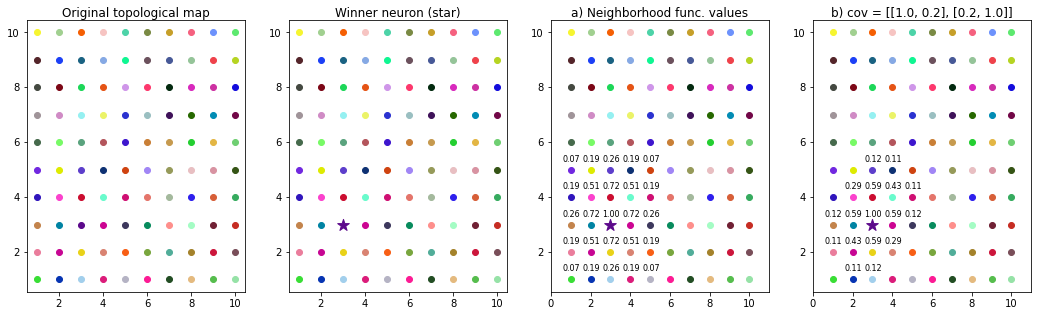

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random 
from scipy.stats import multivariate_normal

random.seed(5)
np.random.seed(5)

#generate the original topological map
top_map = {}
for i in range(1,11):
  for j in range(1,11):
    top_map[(i,j)] = [np.random.rand(),np.random.rand(),np.random.rand()]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(18, 5))

#plots the original topological map
for i in top_map.keys():
  ax1.scatter(i[0],i[1], color=top_map[(i[0],i[1])])

ax1.set_title('Original topological map', y=1.0, pad= -20) #set subplot title

#find the winner neuron
first_training_example = [0.49, 0.10, 0.54]
minDist = 100
idx = (-1,-1)
for i in top_map.keys():
  d = euclidDist(first_training_example, top_map[(i[0],i[1])])
  if(d < minDist):
    minDist = d
    idx = i

print("first training example value: ",first_training_example)
print("winner neuron at position ",idx," and rgb color ",top_map[idx])

#mark the winner neuron in the topological map
for i in top_map.keys():
  if(i == idx):
    ax2.scatter(i[0],i[1], color=top_map[(i[0],i[1])], marker="*", s= 150)
    ax3.scatter(i[0],i[1], color=top_map[(i[0],i[1])], marker="*", s= 150)
    ax4.scatter(i[0],i[1], color=top_map[(i[0],i[1])], marker="*", s= 150)
  else:
    ax2.scatter(i[0],i[1], color=top_map[(i[0],i[1])])
    ax3.scatter(i[0],i[1], color=top_map[(i[0],i[1])])
    ax4.scatter(i[0],i[1], color=top_map[(i[0],i[1])])

ax2.set_title('Winner neuron (star)', y=1.0, pad= -20) #set subplot title


#compute the neighborhood function for all neurons
cov = [[1.5, 0], [0, 1.5]]
def compute_neighborhood(winner, cov_matrix):
    lst_neigh = []
    lst_neigh_value = []
    for i in top_map.keys():

        neigh_value = multivariate_normal.pdf(list(i), mean=winner, cov=cov_matrix)
        max_neigh_value = multivariate_normal.pdf(winner, mean=winner, cov=cov_matrix)

        neigh_value = neigh_value / max_neigh_value

        #for practical purposes, we will consider neighbors neurons whose the neighborhood
        #function value is above 0.05
        if(neigh_value > 0.05):
            lst_neigh.append(i)
            lst_neigh_value.append(neigh_value)

    return lst_neigh, lst_neigh_value

neighbors, neighborhood_func_values = compute_neighborhood(idx, cov)

#annotate the neighborhood function values for each neuron in the neighborhood
for i, n in enumerate(neighbors):
  ax3.annotate('{0:.2f}'.format(neighborhood_func_values[i]), (n[0]-0.4, n[1]+0.3), size=8)

ax3.set_title('a) Neighborhood func. values', y=1.0, pad= -20) #set subplot title
ax3.set_xlim([0, 11])

cov = [[1.0, 0.2], [0.2, 1.0]]
neighbors, neighborhood_func_values = compute_neighborhood(idx, cov)

#annotate the neighborhood function values for each neuron in the neighborhood
for i, n in enumerate(neighbors):
  ax4.annotate('{0:.2f}'.format(neighborhood_func_values[i]), (n[0]-0.4, n[1]+0.3), size=8)

ax4.set_title('b) cov = [[1.0, 0.2], [0.2, 1.0]]', y=1.0, pad= -20) #set subplot title
ax4.set_xlim([0, 11])

plt.show()

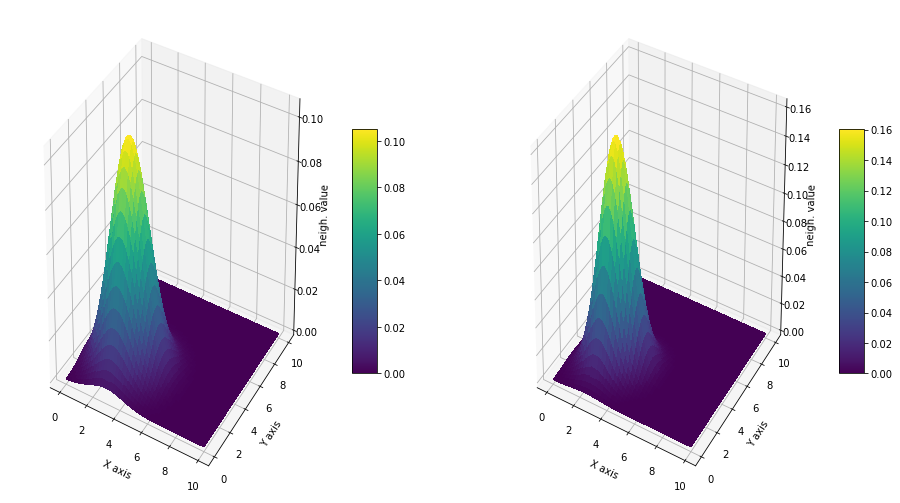

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

#Parameters to set (winning neuron at position (3,3) and covariance matrix [[1.5 0] [0 1.5]])
mu_x = 3
mu_y = 3

#Create grid and multivariate normal
x = np.linspace(0,10,100)
y = np.linspace(0,10,100)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

#Make a 3D plot for cov matrix = [[1.5 0] [0 1.5]]
fig = plt.figure(figsize=(16,9))

rv1 = multivariate_normal([mu_x, mu_y], [[1.5, 0], [0, 1.5]])
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax1.plot_surface(X, Y, rv1.pdf(pos),  cmap='viridis',
                       antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=10)
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('neigh. value')

#Make a 3D plot for cov matrix = [[1. 0.2] [0.2 1.0]]
rv1 = multivariate_normal([mu_x, mu_y], [[1.0, 0.2], [0.2, 1.0]])
ax1 = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax1.plot_surface(X, Y, rv1.pdf(pos),  cmap='viridis',
                        antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=10)
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('neigh. value')


#---------- IMPORTANT NOTE ----------#
#notice that in order to obtain neighborhood function values between 0 and 1, it is necessary
#to normalize the computed values by dividing them by the maximum value for the multivariate 
#normal that happens in the mean of the curve (i.e., in this example it takes place at position (3,3))

plt.show()

3. Change the provided code for the example in Section 1.2.1 to handle a dataset containing 1000 examples of different shades of colors red, green and blue. Change also the map to a 50 x 50 map. Introduce the use of parameters $\tau_1$ and $\tau_2$ by changing the parameter of the neighborhood function and the number of epochs such that the algorithm perform a refinement at later eopchs. 

In [ ]:
#cols is a list containing 1000 randon colors
x_train = []
for i in range(0,1000):
    cols.append([np.random.rand(),np.random.rand(),np.random.rand()])

#list containing all neurons
neurons = []

#dictionary containing the index of a neuron located at coordinate (x,y)
idxPoint = {}
ct = 0

x = [] 
y = []

#creates four neurons organized in a (2,2) grid
for i in np.arange(0.5,2.5,1):
    for j in np.arange(0.5, 2.5, 1):
        
        #x and y are necessary for displaying the scatter plot 
        x.append(i)
        y.append(j)

        idxPoint[(i,j)] = ct
        ct = ct + 1
        neurons.append(cols[np.random.randint(0,1000)])